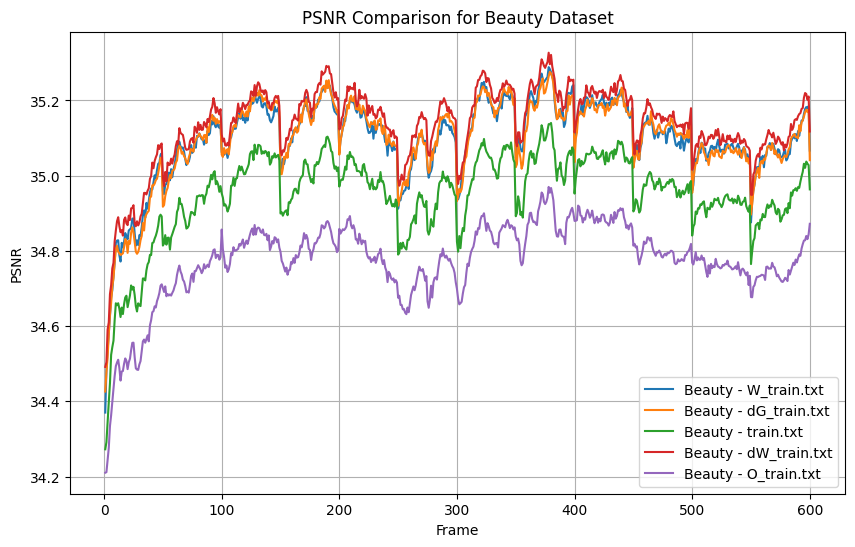

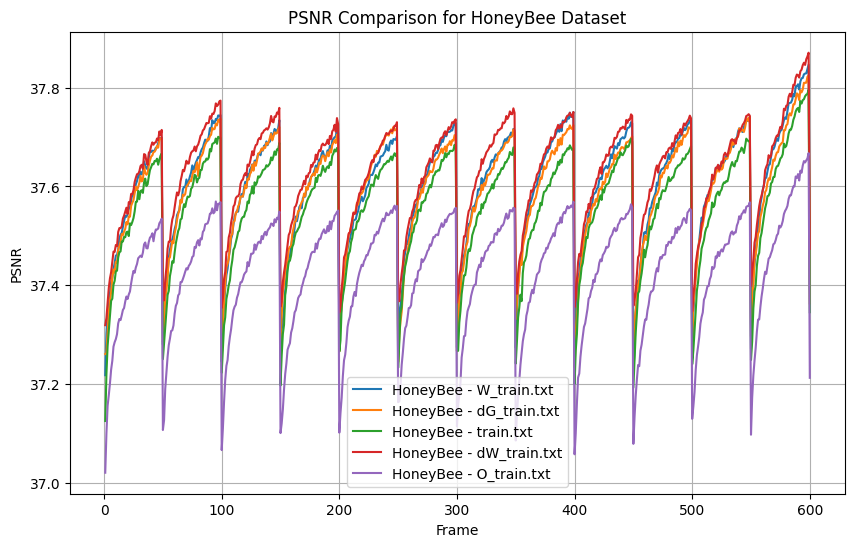

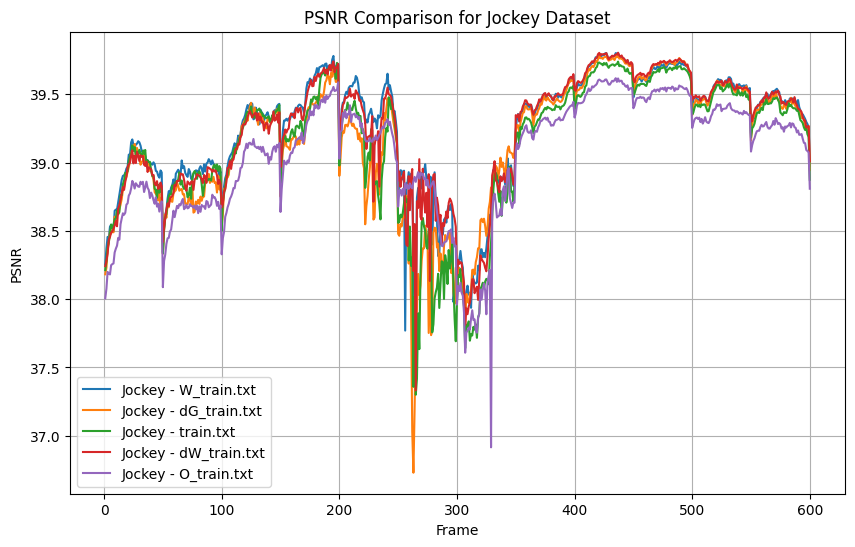

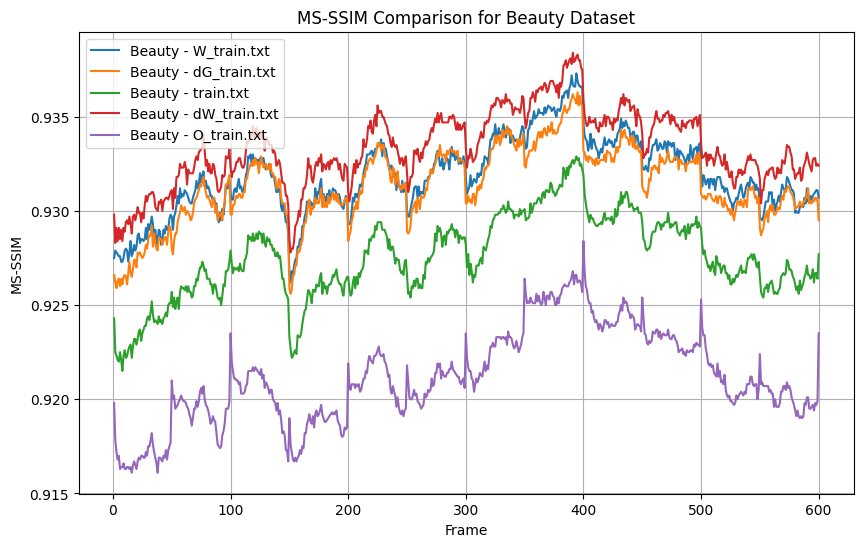

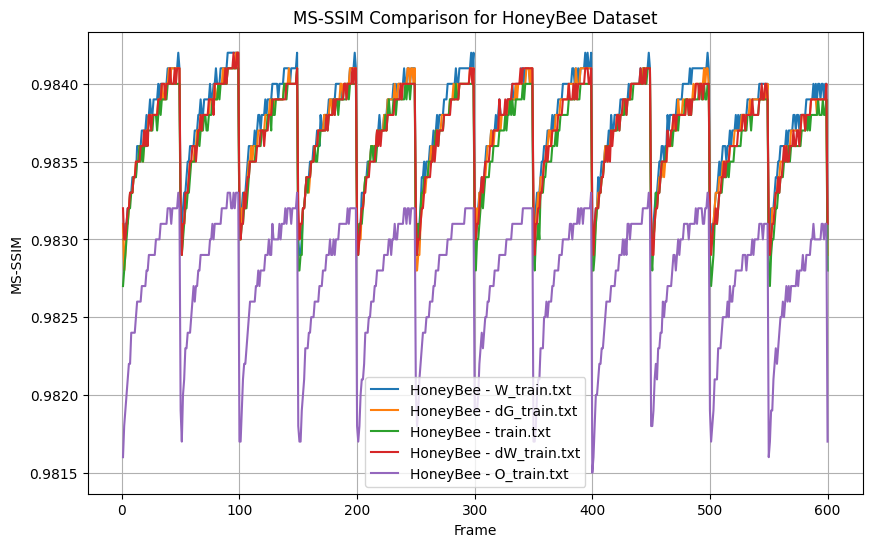

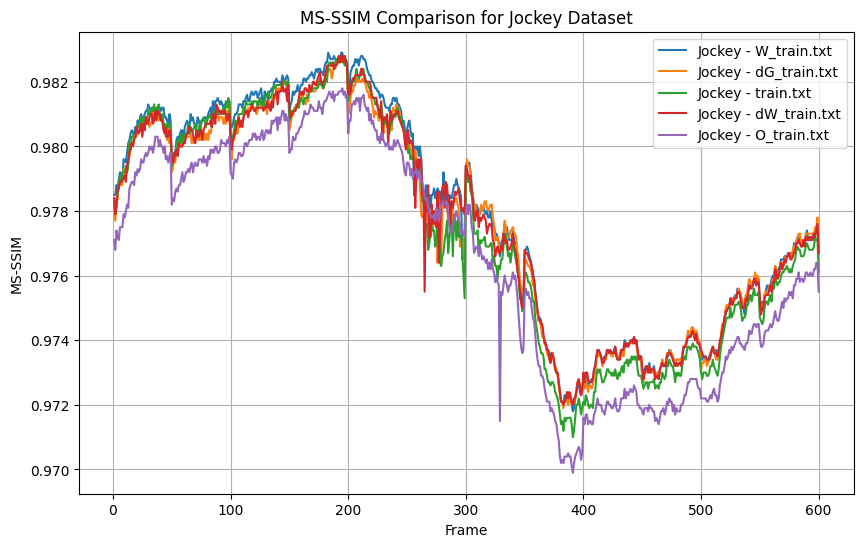

In [2]:
import matplotlib.pyplot as plt
import re

# Define a function to parse the content of the txt files
def parse_file(file_path):
    frames = []
    psnr_values = []
    ssim_values = []
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Skip the last line
        for line in lines[:-1]:
            # Extract frame, PSNR, and SSIM using regular expressions
            match = re.search(r"Frame_(\d+):.*PSNR:(\d+\.\d+),.*MS-SSIM:(\d+\.\d+)", line)
            if match:
                frame = int(match.group(1))
                psnr = float(match.group(2))
                ssim = float(match.group(3))
                
                frames.append(frame)
                psnr_values.append(psnr)
                ssim_values.append(ssim)
    
    return frames, psnr_values, ssim_values

# File paths for each dataset
datasets = ['Beauty', 'HoneyBee', 'Jockey']
files = ['W_train.txt','dG_train.txt','train.txt','dW_train.txt', 'O_train.txt']

# Dictionary to store data
data = {}

# Iterate over datasets and parse each file
for dataset in datasets:
    data[dataset] = {}
    for file in files:
        file_path = f'./{dataset}/{file}'  # Assuming the structure is dataset/file
        frames, psnr_values, ssim_values = parse_file(file_path)
        data[dataset][file] = {'frames': frames, 'psnr': psnr_values, 'ssim': ssim_values}

# Function to plot the data for a specific metric (PSNR or MS-SSIM)
def plot_metric(metric, ylabel):
    for dataset in datasets:
        plt.figure(figsize=(10, 6))
        for file in files:
            frames = data[dataset][file]['frames']
            values = data[dataset][file][metric]
            label = f'{dataset} - {file}'
            plt.plot(frames, values, label=label)
        
        plt.xlabel('Frame')
        plt.ylabel(ylabel)
        plt.title(f'{ylabel} Comparison for {dataset} Dataset')
        plt.legend()
        plt.grid(True)
        plt.show()

# Plot PSNR and MS-SSIM for each dataset
plot_metric('psnr', 'PSNR')
plot_metric('ssim', 'MS-SSIM')
